Importing All the important libraries first for data cleaning and manipulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Checking the directory and selecting the files to work on

os.listdir(r'C:\Users\saysa\Desktop\GIthub Repos\DATA ANALYTICS PROJECTS\UberProject\Uber\Datasets')

In [2]:
# importing the file
uber = pd.read_csv(r'C:\Users\saysa\Desktop\GIthub Repos\DATA ANALYTICS PROJECTS\UberProject\Uber\Datasets\uber-raw-data-janjune-15.csv')

## Data Wrangling

#### Step 1 - Trying to know more about the data and see how we can make necessary transformation for analysis
#### Step 2 - To remove any duplicates and change into appropriate data dypes 
#### Step 3 - Add new Columns if required to make analysis by feature engineering

#### STEP 1 

In [3]:
# Rows and Columns of the dataset
uber.shape

(14270479, 4)

In [4]:
# columns and the data types 
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [5]:
# top of the dataset
uber.head()

Dispatching_base_num          Pickup_date Affiliated_base_num  locationID
0               B02617  2015-05-17 09:47:00              B02617         141
1               B02617  2015-05-17 09:47:00              B02617          65
2               B02617  2015-05-17 09:47:00              B02617         100
3               B02617  2015-05-17 09:47:00              B02774          80
4               B02617  2015-05-17 09:47:00              B02617          90

#### STEP 2 - To remove any duplicates and change into appropriate data types 

In [6]:
#checking the duplicates
uber.duplicated().sum()

np.int64(898225)

In [7]:
# dropping the duplicated rows
uber.drop_duplicates(inplace=True)

In [8]:
print(f'Let us see how many duplicated rows are left now: {uber.duplicated().sum()}')

Let us see how many duplicated rows are left now: 0


We also need to verify if there are any missing values in any columns

In [9]:
# checking the missing values (n/a values)
print(f'The number of missing values in each columns are: {uber.isna().sum()}')

The number of missing values in each columns are: Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     160702
locationID                   0
dtype: int64


The number of missig value without any context looks massive, but we need to know how big it is compared to the actual size of data before any actions. So let's just quickly see the percentage of data that is missing in this case.

In [10]:
# percentage of data which is 'na' relative to the original size

rounded_perc = round(uber.isna().mean()*100.0,3)
print(rounded_perc.astype(str)+'%')

Dispatching_base_num      0.0%
Pickup_date               0.0%
Affiliated_base_num     1.202%
locationID                0.0%
dtype: object


'Affliliated_base_num' column has only 1.202 % despite having 160702 values. So we can safely discard the missing values in this case.

In [11]:
uber = uber.dropna(subset=['Affiliated_base_num'])

In [12]:
# Checking the missing values currently
uber.isna().sum()

Dispatching_base_num    0
Pickup_date             0
Affiliated_base_num     0
locationID              0
dtype: int64

#### Step 3 - Add new Columns if required to make analysis.

In [13]:
# Convert the date column into datetime 
uber['Pickup_date']=pd.to_datetime(uber['Pickup_date'])

In [14]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13211552 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Dispatching_base_num  object        
 1   Pickup_date           datetime64[ns]
 2   Affiliated_base_num   object        
 3   locationID            int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 504.0+ MB


We also need to make some date related columns from the main date column for further analysis on date and time.
Let us extract month, monthname, hours, dayname, and daynumber of month from the pickup date column

In [15]:
# Feature Engineering for getting the useful columns for EDA

# Extracting from datetime column
uber['Month'] = uber['Pickup_date'].dt.month
uber['Monthname'] = uber['Pickup_date'].dt.strftime('%b')
uber['Hours'] = uber['Pickup_date'].dt.hour
uber['Dayname'] = uber['Pickup_date'].dt.day_name()
uber['Daynumber']=uber ['Pickup_date'].dt.day

In [16]:
uber.head()

Dispatching_base_num         Pickup_date Affiliated_base_num  locationID  \
0               B02617 2015-05-17 09:47:00              B02617         141   
1               B02617 2015-05-17 09:47:00              B02617          65   
2               B02617 2015-05-17 09:47:00              B02617         100   
3               B02617 2015-05-17 09:47:00              B02774          80   
4               B02617 2015-05-17 09:47:00              B02617          90   

   Month Monthname  Hours Dayname  Daynumber  
0      5       May      9  Sunday         17  
1      5       May      9  Sunday         17  
2      5       May      9  Sunday         17  
3      5       May      9  Sunday         17  
4      5       May      9  Sunday         17

Since our EDA might need us to do some analysis based on days and months, we need to set up a order in the days and months.
For that we have convert our dayname and monthname columns into category dtype and assign a order like Monday,Tuesday,....Sunday and likewise for months too.

In [17]:
# making a list of ordered dayname and monthname
order_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
order_month = ['Jan','Feb','Mar','Apr','May','Jun']

# Converting into Category DType along wth the order of days and months
uber['Dayname'] =  pd.Categorical(uber['Dayname'],categories=order_day,ordered =True)
uber['Monthname'] =  pd.Categorical(uber['Monthname'],categories=order_month,ordered =True)

#### Since all the cleaning and manipulation is complete in our required dataset, we can just take a sample of the population dataset and work on the dataset sample for further analysis and visualization.


In [18]:
# taking a 10% sample o the original data
uber = uber.sample(frac = 0.1)

## EXPLORATORY DATA ANALYSIS (EDA) and DATA VISUALISATION



### 1) MONTHS vs #NUMBER OF TRIPS

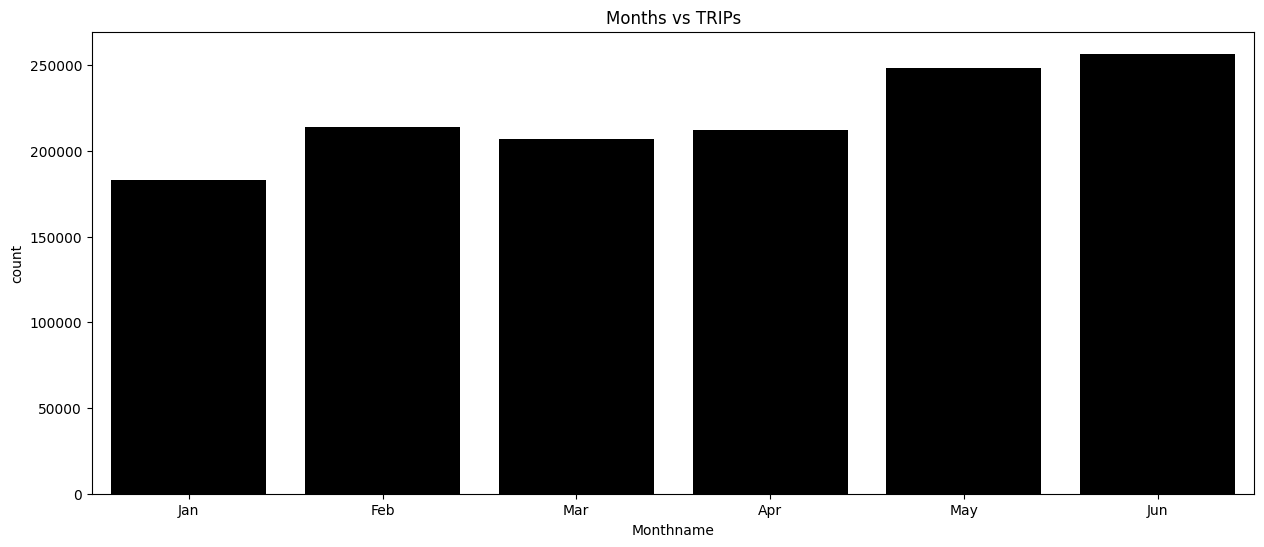

In [19]:
# Setting up the plot figure size 
plt.figure(figsize=(15,6))

# Countplot for Monthname vs No. of Trips
sns.countplot(x='Monthname',data=uber,color= 'Black')
plt.title('Months vs TRIPs')
plt.show()

### INSIGHTS :

We can see the number of trips are maximum in the months of June followed by May. And also considering February has smallest number of days still it has come in 3rd spot.

### 2) MONTHS vs # NUMBER OF TRIPS but we have further divided it into days of each month

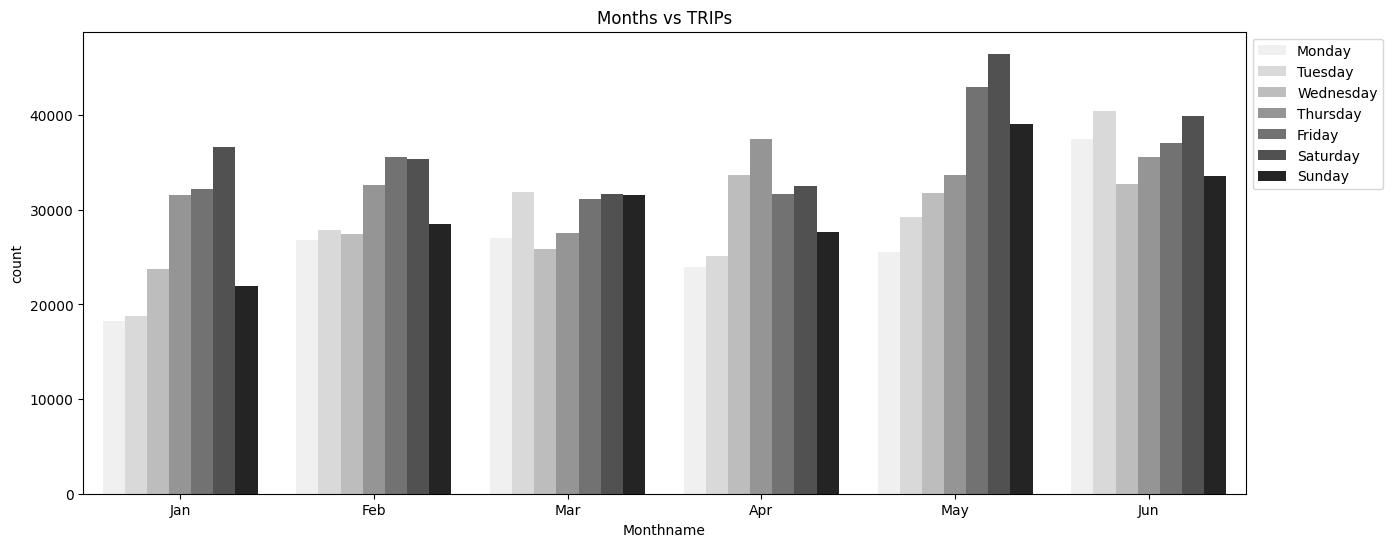

In [20]:
# Setting up the plot figure size 
plt.figure(figsize=(15,6))

# Countplot for Monthname vs No. of Trips but legends are given as days in a week too
sns.countplot(x='Monthname',data=uber,hue='Dayname',palette= 'Greys')
plt.title('Months vs TRIPs')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')  # placing the legend box in the top left corner
plt.show()

### INSIGHTS:

Just a general trend of people having more number of trips consistently on Fridays and Saturdays. There are exceptions in other months but mostly the general trend is this.

### 3) Hours of the day VS Numbers of Trips

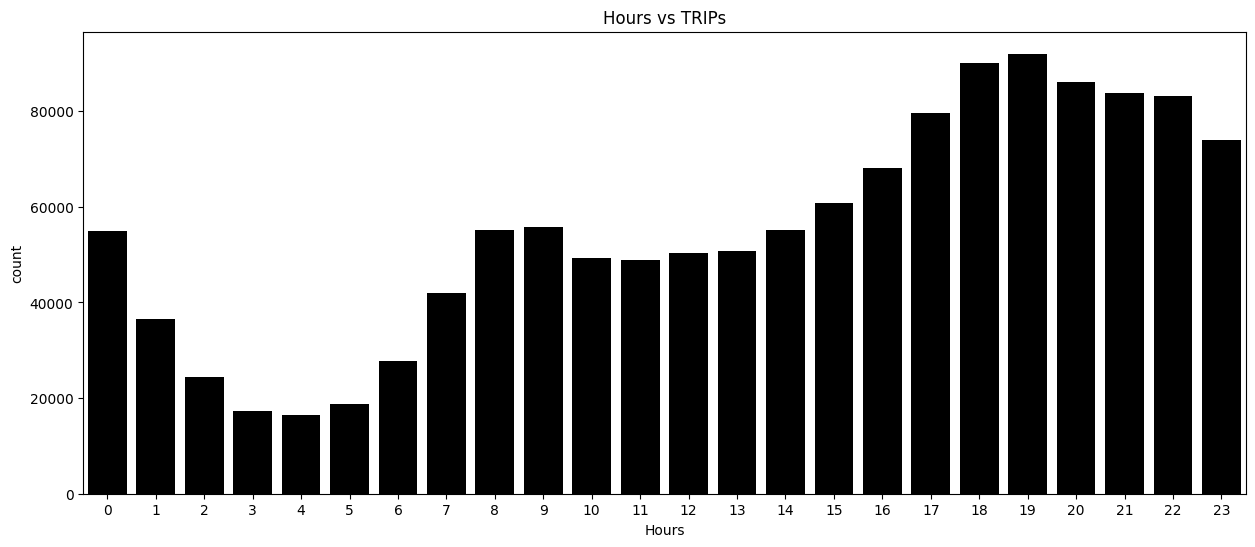

In [21]:
# Setting up the plot figure size 
plt.figure(figsize=(15,6))

#Countplot of Hours and Number of Trips
sns.countplot(x='Hours',data=uber,color='Black')
plt.title('Hours vs TRIPs')
plt.show()

### INSIGHTS :

As we can see the number of trips are lowest when the hours are in the deep night times and early mornings from 2 AM to 6 AM, post which there has been a rise in the number of rides and a stagnation till 3 PM. From 4PM till 7PM the rise is max peaking at 7PM and then it drops gradually.

Based on the Outcomes :

-> PEAK HOURS - 4PM to 11PM

-> NON PEAK HOURS - Rest

-> Highest Traffic - 7PM

-> Lowest Traffic - 4AM


### 4) Days in the Week VS No. of TRIPS

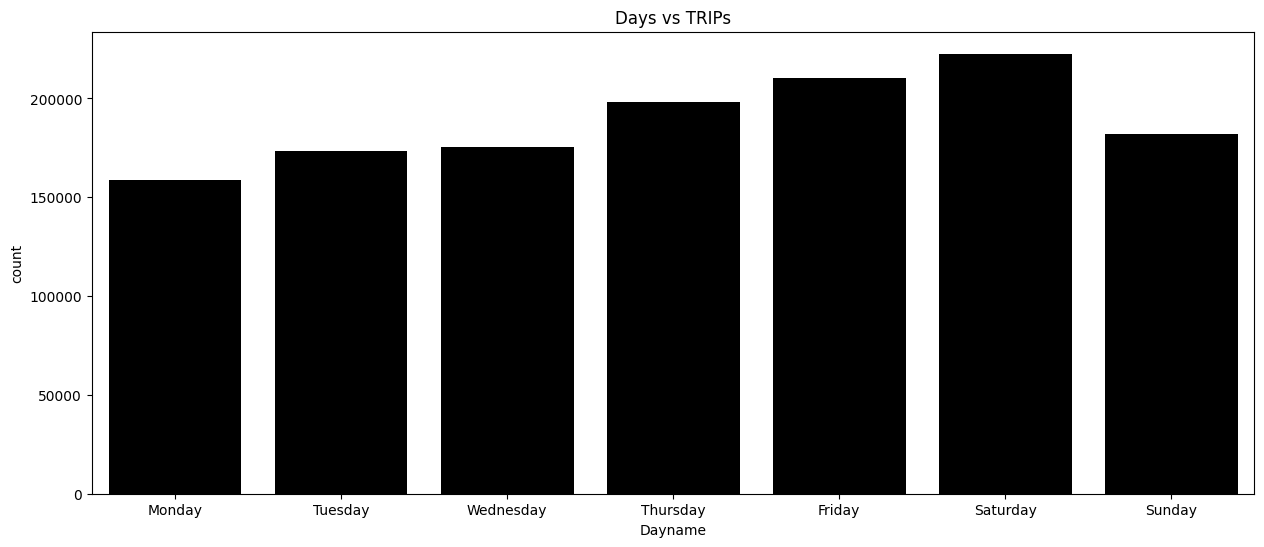

In [22]:
# Setting up the plot figure size 
plt.figure(figsize=(15,6))

# Countplot for Dayname vs No. of Trips
sns.countplot(x='Dayname',data=uber, color='Black')
plt.title('Days vs TRIPs')
plt.show()

### INSIGHTS :

Clearly the number of trips made in Saturdays and Fridays are Top 2. One possible explanation could be the people coming back from Office and going to relax in the weekends during Friday Nights and Saturdays. Possible reason why Sundays are low since usually people try to wind down before the end of weekends. Mondays are the lowest in terms of trips are it is highly regarded as the slowest day of the week.

### 5) Pickups happening in the same bases VS in different bases

In this section we will analyse what percentage of pickups are happening in the same area vs in different areas. 

Why is it necessary? 

Because based on the percentage we can tell if the pickup algorithm of Uber is good or not as the pickups of different bases often lead to inefficiency in Traffic Handling and even lead to more fuel consumptions too.

In [23]:
#Assigning two variable the cases when we have same pickup base numbers and other for different base numbers

var1= uber[uber['Dispatching_base_num'] != uber['Affiliated_base_num']].shape[0]
var2= uber[uber['Dispatching_base_num'] == uber['Affiliated_base_num']].shape[0]

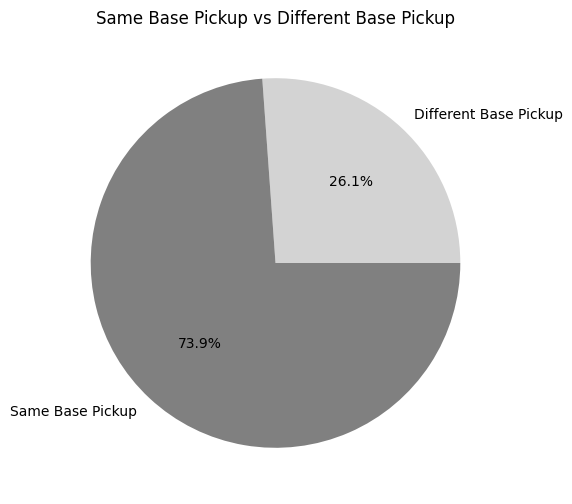

In [24]:
# Setting up the plot figure size 
plt.figure(figsize=(6,6))

#Pie plot 
plt.pie([var1,var2],labels=['Different Base Pickup','Same Base Pickup'],autopct='%1.1f%%',colors=['lightgray','gray'])
plt.title('Same Base Pickup vs Different Base Pickup')
plt.show()

### INSIGHTS :

Same Base Pickups - 73.9 %

Different Base Pickups - 26.1%

### 6) Trips on Different Base numbers

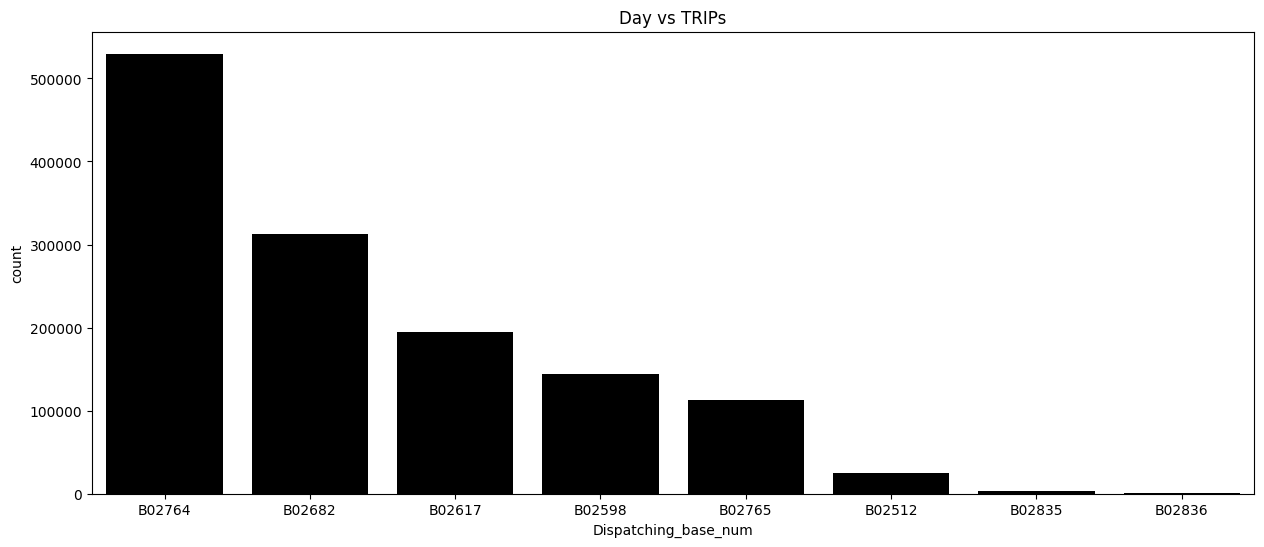

In [25]:
# Setting up the plot figure size 
plt.figure(figsize=(15,6))

# Countplot of Dispatching base number and No. of Trips
sns.countplot(x='Dispatching_base_num',data=uber, color='Black')
plt.title('Day vs TRIPs')
plt.show()

### INSIGHTS :

Base number with highest trips is - B02764 and Lowest trips is - B02836

### 7) HEATMAP FOR MONTHS VS DAYS TO DETERMINE THE TRAFFIC RUSH

In [26]:
# Crosstab to create a custom dataset for Days and Months with values as Number of Trips
heatmap = pd.crosstab(uber['Dayname'],uber['Monthname'])

In [27]:
# Showing the crosstab(pivot table)
heatmap

Monthname    Jan    Feb    Mar    Apr    May    Jun
Dayname                                            
Monday     18214  26769  27048  23914  25535  37494
Tuesday    18808  27833  31839  25073  29228  40474
Wednesday  23711  27461  25876  33663  31769  32715
Thursday   31543  32567  27577  37479  33666  35611
Friday     32196  35579  31137  31631  42929  37016
Saturday   36657  35403  31697  32523  46483  39882
Sunday     21930  28494  31521  27665  39016  33529

<Axes: xlabel='Monthname', ylabel='Dayname'>

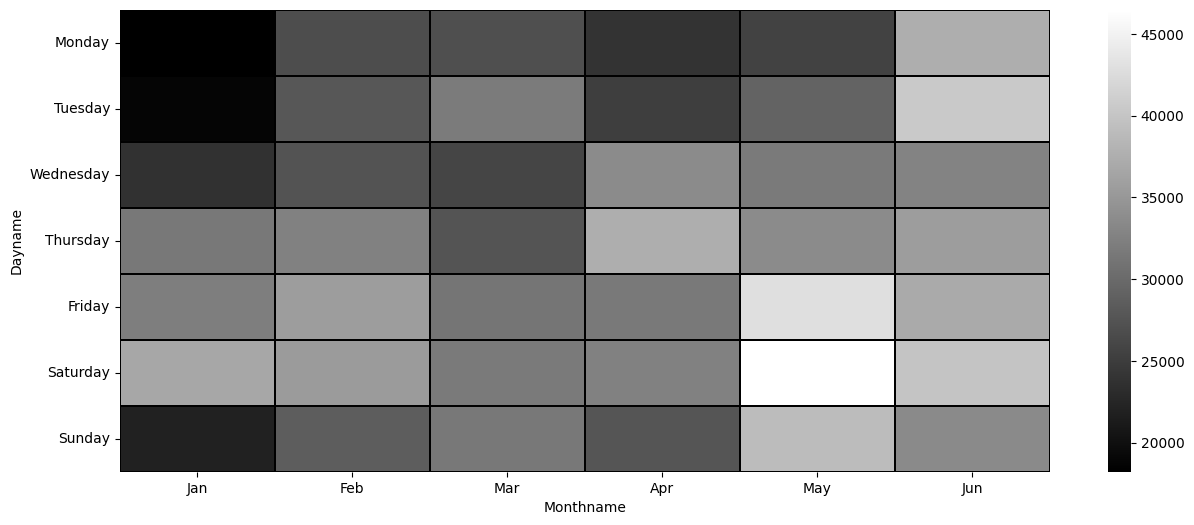

In [29]:
# Setting up the plot figure size 
plt.figure(figsize=(15,6))

# Heatmap plotting
sns.heatmap(heatmap,cmap = 'gray',linewidths=0.3,linecolor='black')

### INSIGHTS :

From this heatmap we can clearly conclude that the Mondays are the lowest days in all the Months in general.

The peak rides have been made during the Fridays and Saturdays in the month of May.

### 8) HEATMAP FOR HOURS VS DAYS TO DETERMINE THE TRAFFIC HOURS

In [30]:
# Crosstab to create a custom dataset for Days and Hours with values as Number of Trips
heatmap1 = pd.crosstab(uber['Dayname'],uber['Hours'])

<Axes: xlabel='Hours', ylabel='Dayname'>

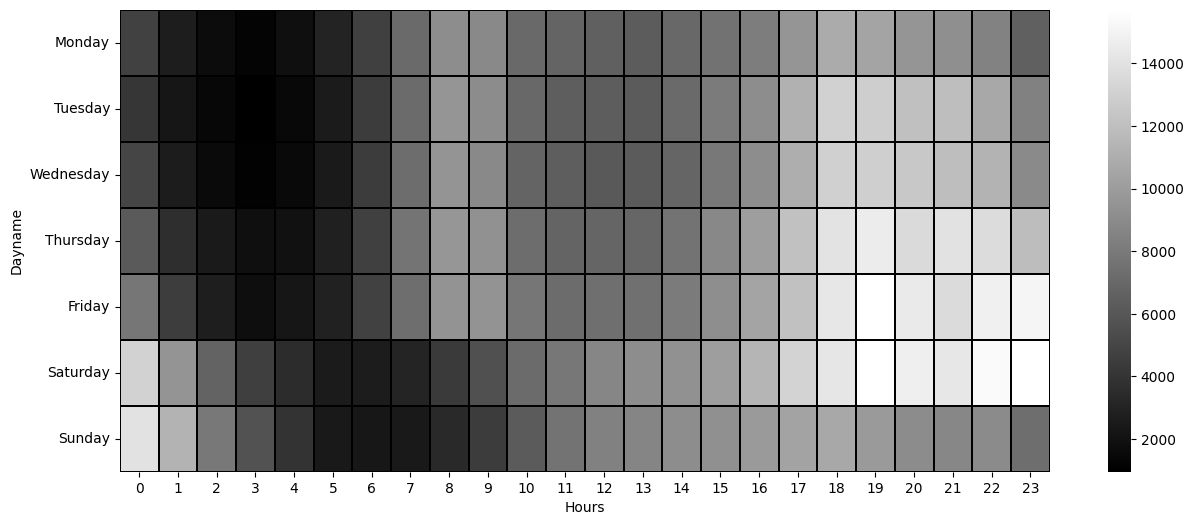

In [31]:
# Setting up the plot figure size 
plt.figure(figsize=(15,6))

# Heatmap plotting
sns.heatmap(heatmap1,cmap = 'gray',linewidths=0.3,linecolor='black')

### INSIGHTS :

From this heatmap we can clearly conclude that the early hours are the lowest trips through out the days in general.

The peak rides have been made during the Fridays and Saturdays.

### 9) HEATMAP FOR HOURS VS DAYS of the Month 

In [32]:
# Crosstab to create a custom dataset for Days of the Month and Hours with values as Number of Trips
heatmap2 = pd.crosstab(uber['Daynumber'],uber['Hours'])

<Axes: xlabel='Hours', ylabel='Daynumber'>

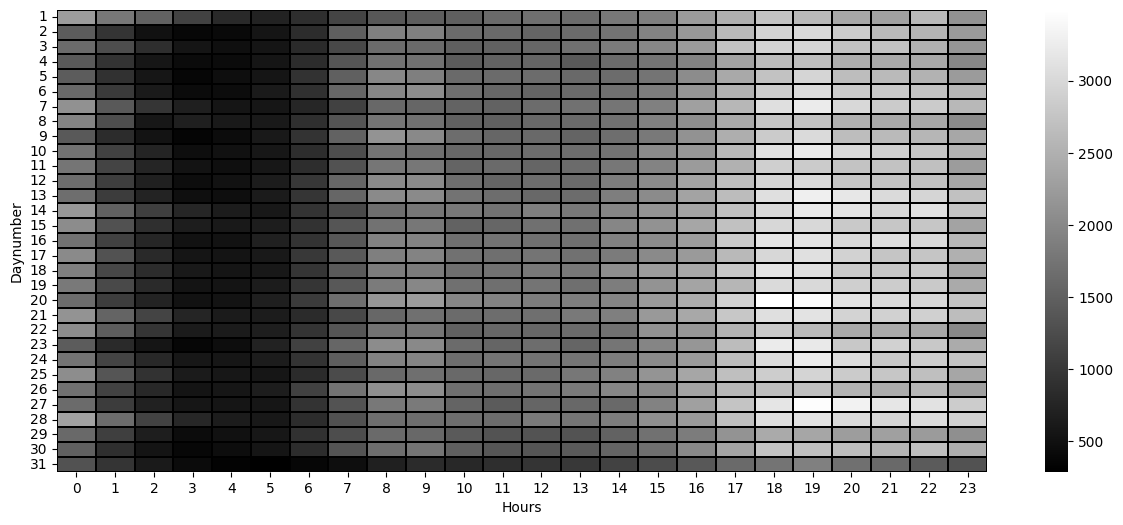

In [33]:
# Setting up the plot figure size 
plt.figure(figsize=(15,6))

# Heatmap plotting
sns.heatmap(heatmap2,cmap = 'gray',linewidths=0.3,linecolor='black')

### INSIGHTS :

From this heatmap we can clearly conclude that the early hours are the lowest trips through out the days in general no matter the days.

The peak rides have been observed around 6 PM - 7 PM.

### 10) HEATMAP FOR LOCATION IDs and DISPATCHING BASE NUMBER to determine the Traffic locations

In [40]:
# unique values in all columns
uber.locationID.unique().sum()

np.int64(34458)

Since the LocationID has more than 34458 unique values , I decided to take the top 60 by size and relate that with the Base numbers of uber 

In [46]:
uber['Dispatching_base_num'].value_counts()

Dispatching_base_num
B02764    529985
B02682    312929
B02617    194595
B02598    144478
B02765    112140
B02512     24252
B02835      2573
B02836       203
Name: count, dtype: int64

Also just to be sure we checked how many unique values are there for Dispatching base numbers which is 8. So we are fine with the unique values count which is normal and we dont need to take any range of it.

In [41]:
# Creating a separate dataset to allocate the top 60 locations and their pivot table with Dispatching base num

# filtering out top 60 locations in size 
base= uber['locationID'].value_counts().nlargest(60).index

# creating the dataset
basedf = uber[uber['locationID'].isin(base)]
basedf

Dispatching_base_num         Pickup_date Affiliated_base_num  \
14217597               B02764 2015-05-12 15:33:00              B02764   
8633749                B02764 2015-03-15 20:42:00              B01877   
2905566                B02764 2015-06-18 15:30:00              B02764   
907960                 B02764 2015-04-01 08:49:00              B02764   
1033808                B02682 2015-05-19 22:16:00              B02682   
...                       ...                 ...                 ...   
10696321               B02598 2015-06-25 22:24:00              B02598   
10012502               B02598 2015-06-10 16:49:00              B02617   
3002403                B02682 2015-06-22 13:21:00              B02682   
627935                 B02764 2015-06-06 01:00:00              B02764   
7813546                B02764 2015-05-31 03:13:00              B00412   

          locationID  Month Monthname  Hours    Dayname  Daynumber  
14217597         142      5       May     15    Tuesday         12  
8633749           33      3       Mar     20     Sunday         15  
2905566          137      6       Jun     15   Thursday         18  
907960           158      4       Apr      8  Wednesday          1  
1033808          142      5       May     22    Tuesday         19  
...              ...    ...       ...    ...        ...        ...  
10696321          90      6       Jun     22   Thursday         25  
10012502         164      6       Jun     16  Wednesday         10  
3002403          158      6       Jun     13     Monday         22  
627935           161      6       Jun      1   Saturday          6  
7813546           79      5       May      3     Sunday         31  

[1077281 rows x 9 columns]

In [47]:
# Heatmap of Dispatching base numbers and LocationIDs
heatmap3 = pd.crosstab(uber['Dispatching_base_num'],basedf['locationID'])
heatmap3

locationID             4     7     13    17    25    33    36    37    48   \
Dispatching_base_num                                                         
B02512                 113   120   271    78    90   101    57   105   439   
B02598                 907   780  1464   707   679   824   666   894  2464   
B02617                1249  1126  2066  1102   924  1112   913  1446  3435   
B02682                2183  2357  2904  1920  1697  1825  1945  2636  5519   
B02764                3438  3552  5559  3215  2647  2958  3157  4139  9501   
B02765                 713   723  1002   724   603   691   624   823  2035   
B02835                  19    16    21    21     8    12    16    20    43   
B02836                   1     3     1     4     0     2     6     7     2   

locationID             49   ...   236    237   238   239    246    249   255  \
Dispatching_base_num        ...                                                
B02512                  95  ...   543    733   249   331    567    605   231   
B02598                 799  ...  2373   3109  1409  1887   2818   3584  2234   
B02617                1278  ...  3338   4044  1934  2600   3906   4564  2857   
B02682                2196  ...  4841   5877  3114  4128   5815   6447  4701   
B02764                3563  ...  8279  10159  4960  6923  10072  11358  7960   
B02765                 775  ...  1748   2085   965  1400   2165   2373  1677   
B02835                  11  ...    38     33    30    33     49     46    31   
B02836                   2  ...     1      2     0     2      2      1     4   

locationID             256   262   263  
Dispatching_base_num                    
B02512                 153   140   223  
B02598                1335  1059  1291  
B02617                1887  1531  1932  
B02682                3345  2397  2877  
B02764                5399  4165  5150  
B02765                1148   801  1014  
B02835                  27    14    29  
B02836                   1     1     1  

[8 rows x 60 columns]

<Axes: xlabel='locationID', ylabel='Dispatching_base_num'>

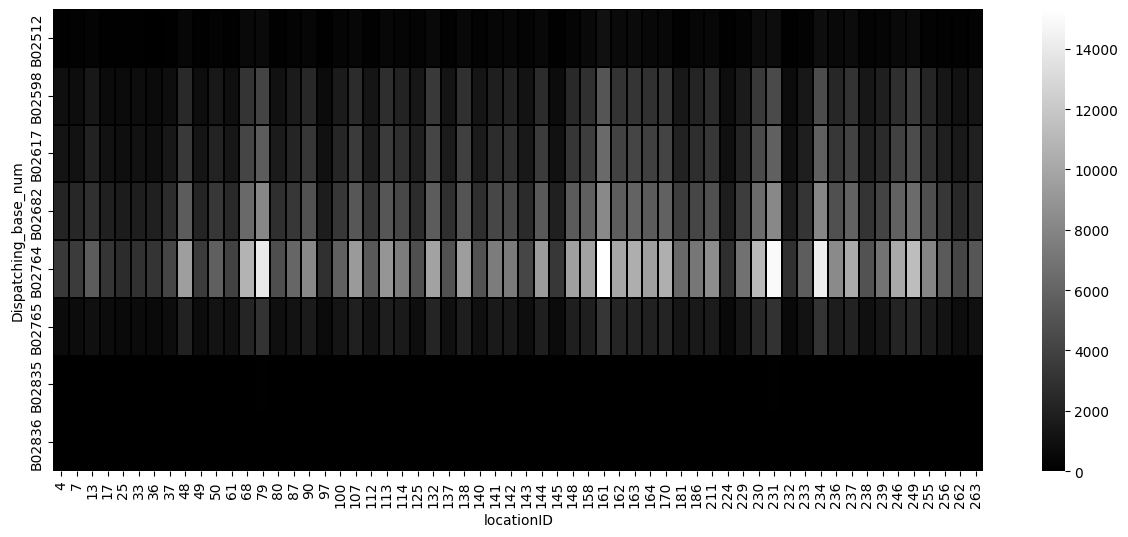

In [52]:
# Setting up the plot figure size 
plt.figure(figsize=(15,6))

# Heatmap plotting
sns.heatmap(heatmap3,cmap = 'gray',linewidths=0.3,linecolor='black')

### INSIGHTS :

From this heatmap we can clearly conclude that the base numbers: B02836, B02835 and B02512 are the lowest dispatching base numbers in all the locations in general.

The peak rides have been made with dispatching base number : B02764 in locations such as 68,79,161,231,234 and 249.

Similarly we can create heatmap for Dispatching base numbers and Days 

### 11) HEATMAP FOR Dispatching Base Numbers VS DAYS 

<Axes: xlabel='Dayname', ylabel='Dispatching_base_num'>

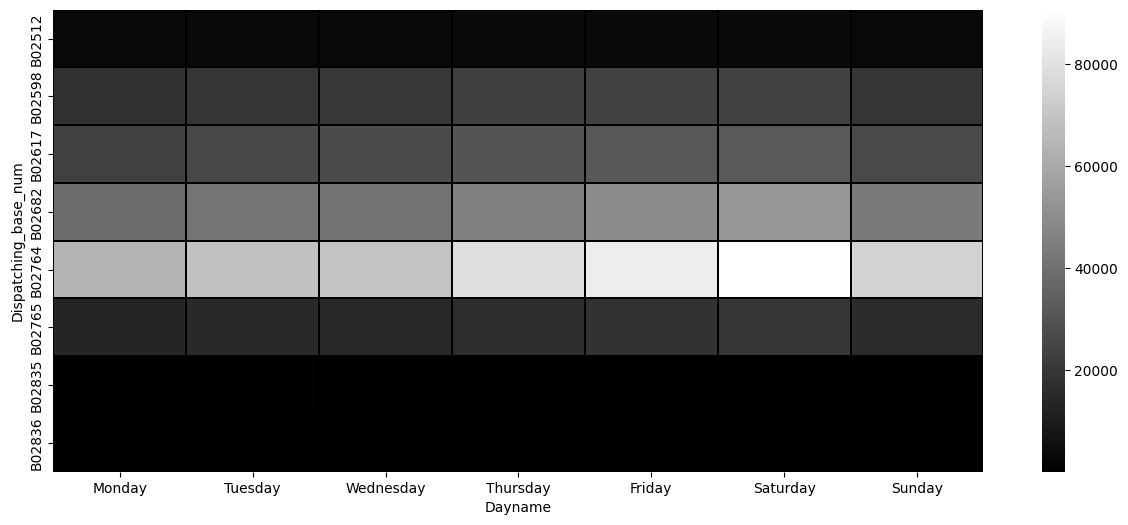

In [53]:
# creating the pivot table
heatmap4 = pd.crosstab(uber['Dispatching_base_num'],uber['Dayname'])

# Setting up the plot figure size 
plt.figure(figsize=(15,6))

# Heatmap plotting
sns.heatmap(heatmap4,cmap = 'gray',linewidths=0.3,linecolor='black')

### 11) HEATMAP FOR Dispatching Base Numbers VS Hours

<Axes: xlabel='Hours', ylabel='Dispatching_base_num'>

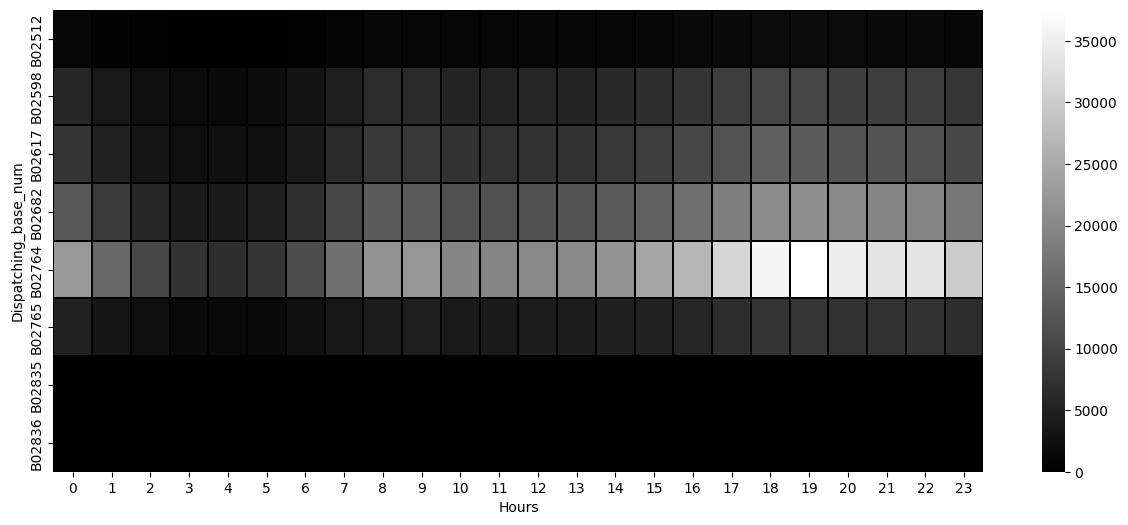

In [54]:
# creating the pivot table
heatmap5 = pd.crosstab(uber['Dispatching_base_num'],uber['Hours'])

# Setting up the plot figure size 
plt.figure(figsize=(15,6))

# Heatmap plotting
sns.heatmap(heatmap5,cmap = 'gray',linewidths=0.3,linecolor='black')

### INSIGHTS :

From this heatmaps of Dispatching base numbers with Hours and Days, no new informations were revealed.

## We are now using another dataset where we can see the info on active vehicles and trips done along with their Base number

In [55]:
#Importing the dataset
uberFOIL = pd.read_csv(r'C:\Users\saysa\Desktop\GIthub Repos\DATA ANALYTICS PROJECTS\UberProject\Uber\Datasets\Uber-Jan-Feb-FOIL.csv')

In [58]:
uberFOIL

dispatching_base_number        date  active_vehicles  trips
0                    B02512  01-01-2015              190   1132
1                    B02765  01-01-2015              225   1765
2                    B02764  01-01-2015             3427  29421
3                    B02682  01-01-2015              945   7679
4                    B02617  01-01-2015             1228   9537
..                      ...         ...              ...    ...
349                  B02764   2/28/2015             3952  39812
350                  B02617   2/28/2015             1372  14022
351                  B02682   2/28/2015             1386  14472
352                  B02512   2/28/2015              230   1803
353                  B02765   2/28/2015              747   7753

[354 rows x 4 columns]

In [59]:
#checking duplicates
uberFOIL.duplicated().sum()

np.int64(0)

In [60]:
#checking missing values
uberFOIL.isna().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

Clean Data. SO we can go ahead do our analysis

In [61]:
# grouping the dataset by Dispatching base numbers and its respective active vehicles and trips
summary =uberFOIL.groupby('dispatching_base_number')[['active_vehicles','trips']].sum().reset_index()
#summary = uberFOIL.groupby('dispatching_base_number').agg({'active_vehicles':'sum','trips':'sum'}).reset_index()  - another code for same output
summary

dispatching_base_number  active_vehicles    trips
0                  B02512            13125    93786
1                  B02598            58653   540791
2                  B02617            79758   725025
3                  B02682            71431   662509
4                  B02764           217290  1914449
5                  B02765            22575   193670

### PLOT : Active vehicles VS Trips made in different Dispatching base numbers

<Axes: xlabel='dispatching_base_number', ylabel='trips'>

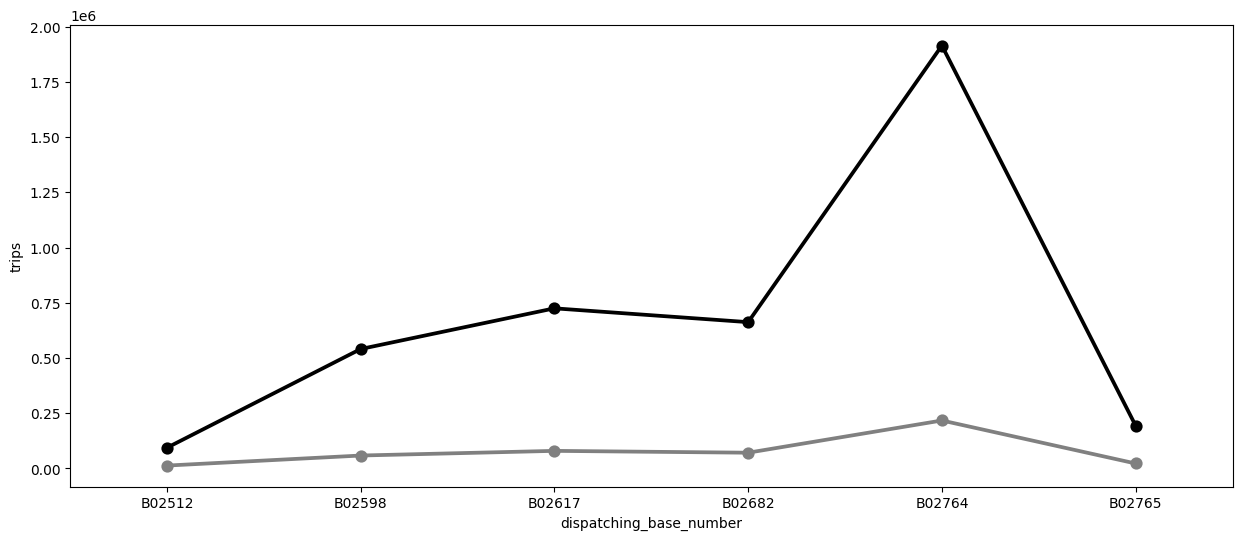

In [63]:
# Setting up the plot figure size 
plt.figure(figsize=(15,6))

# Point plotting of active vehicles and Trips made
sns.pointplot(x='dispatching_base_number', y='trips', data=summary, color='black')
sns.pointplot(x='dispatching_base_number', y='active_vehicles', data=summary, color='gray')

We do see a clear relationship between the active vehicles and the trips made. To solidify our claim let us do a correlation test on the two variables and check the strength of their dependencies

<Axes: >

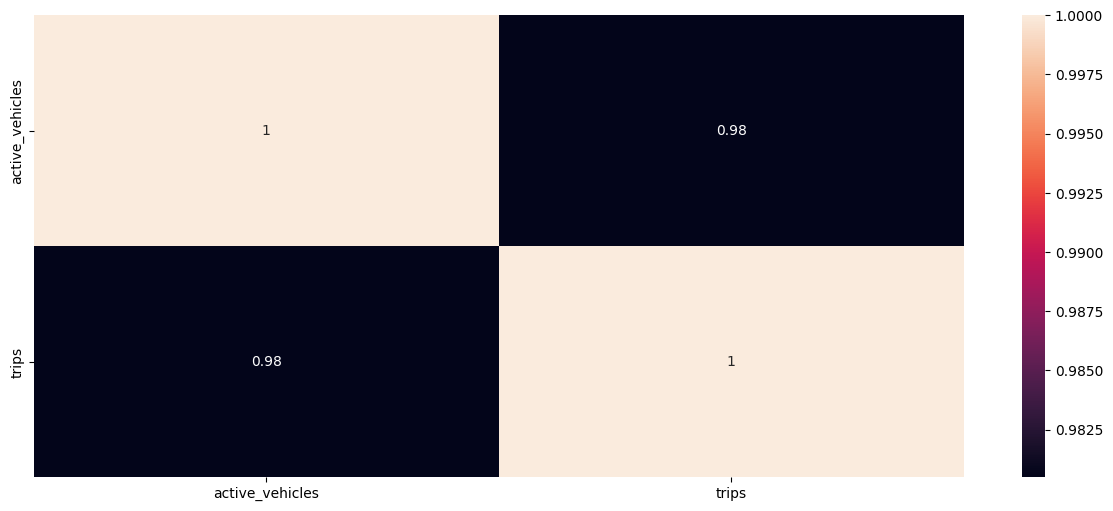

In [64]:
# Defining the correlation
correlation = uberFOIL[['active_vehicles','trips']].corr()

# Setting up the plot figure size 
plt.figure(figsize=(15,6))

# Heatmap plotting for correlation
sns.heatmap(correlation, annot=True )

### INSIGHTS :

Clearly the more active vehicles justifies more trips possible in Dispatching base number B02764

In [37]:
uberFOIL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [38]:
uberFOIL['date'].value_counts()

date
01-01-2015    6
01-02-2015    6
01-03-2015    6
01-04-2015    6
01-05-2015    6
01-06-2015    6
01-07-2015    6
01-08-2015    6
01-09-2015    6
01-10-2015    6
01-11-2015    6
01-12-2015    6
1/13/2015     6
1/14/2015     6
1/15/2015     6
1/16/2015     6
1/17/2015     6
1/18/2015     6
1/19/2015     6
1/20/2015     6
1/21/2015     6
1/22/2015     6
1/23/2015     6
1/24/2015     6
1/25/2015     6
1/26/2015     6
1/27/2015     6
1/28/2015     6
1/29/2015     6
1/30/2015     6
1/31/2015     6
02-01-2015    6
02-02-2015    6
02-03-2015    6
02-04-2015    6
02-05-2015    6
02-06-2015    6
02-07-2015    6
02-08-2015    6
02-09-2015    6
02-10-2015    6
02-11-2015    6
02-12-2015    6
2/13/2015     6
2/14/2015     6
2/15/2015     6
2/16/2015     6
2/17/2015     6
2/18/2015     6
2/19/2015     6
2/20/2015     6
2/21/2015     6
2/22/2015     6
2/23/2015     6
2/24/2015     6
2/25/2015     6
2/26/2015     6
2/27/2015     6
2/28/2015     6
Name: count, dtype: int64

In [39]:
uberFOIL['date']= uberFOIL['date'].str.replace('/','-')

In [41]:
uberFOIL['date'] = pd.to_datetime(uberFOIL['date'])

In [42]:
uberFOIL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.2+ KB


In [43]:
uberFOIL['date'].value_counts()

date
2015-01-01    6
2015-01-02    6
2015-01-03    6
2015-01-04    6
2015-01-05    6
2015-01-06    6
2015-01-07    6
2015-01-08    6
2015-01-09    6
2015-01-10    6
2015-01-11    6
2015-01-12    6
2015-01-13    6
2015-01-14    6
2015-01-15    6
2015-01-16    6
2015-01-17    6
2015-01-18    6
2015-01-19    6
2015-01-20    6
2015-01-21    6
2015-01-22    6
2015-01-23    6
2015-01-24    6
2015-01-25    6
2015-01-26    6
2015-01-27    6
2015-01-28    6
2015-01-29    6
2015-01-30    6
2015-01-31    6
2015-02-01    6
2015-02-02    6
2015-02-03    6
2015-02-04    6
2015-02-05    6
2015-02-06    6
2015-02-07    6
2015-02-08    6
2015-02-09    6
2015-02-10    6
2015-02-11    6
2015-02-12    6
2015-02-13    6
2015-02-14    6
2015-02-15    6
2015-02-16    6
2015-02-17    6
2015-02-18    6
2015-02-19    6
2015-02-20    6
2015-02-21    6
2015-02-22    6
2015-02-23    6
2015-02-24    6
2015-02-25    6
2015-02-26    6
2015-02-27    6
2015-02-28    6
Name: count, dtype: int64

#### IMPORTING PLOTLY AND FOLIUM FOR INTERACTIVE CHARTS AND GEO MAP VISUALISAIONS

In [46]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [49]:
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot 

In [50]:
init_notebook_mode(connected=True)

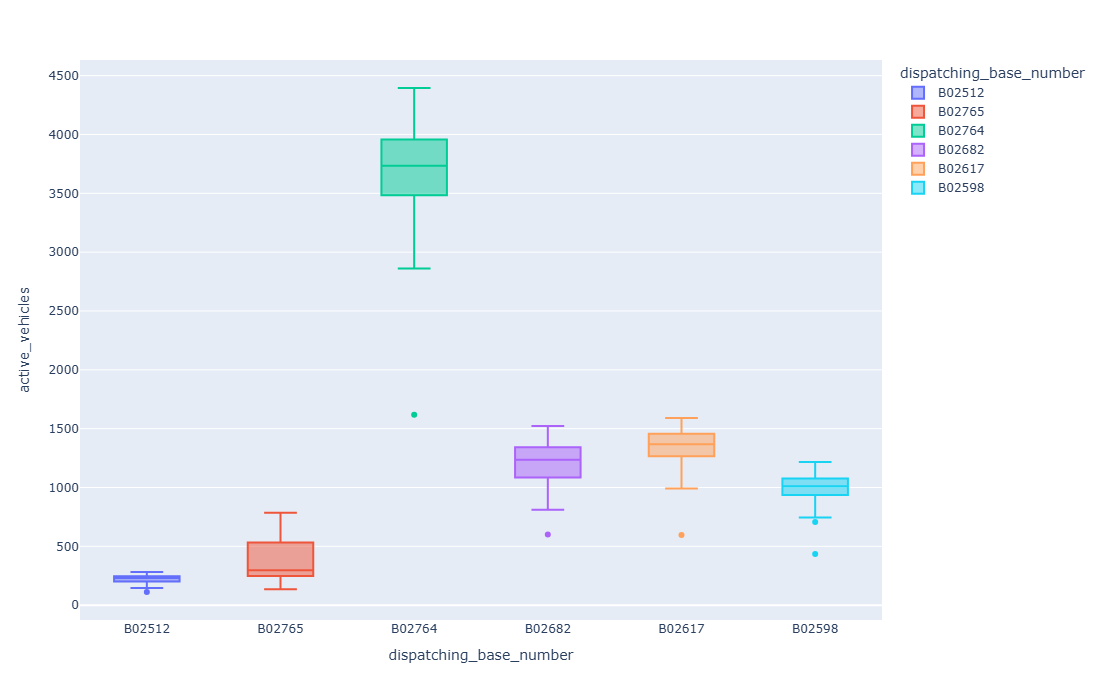

In [47]:
px.box(x='dispatching_base_number',
       y='active_vehicles',data_frame = uberFOIL, orientation ='v',width = 800, height =700 ,color= 'dispatching_base_number')

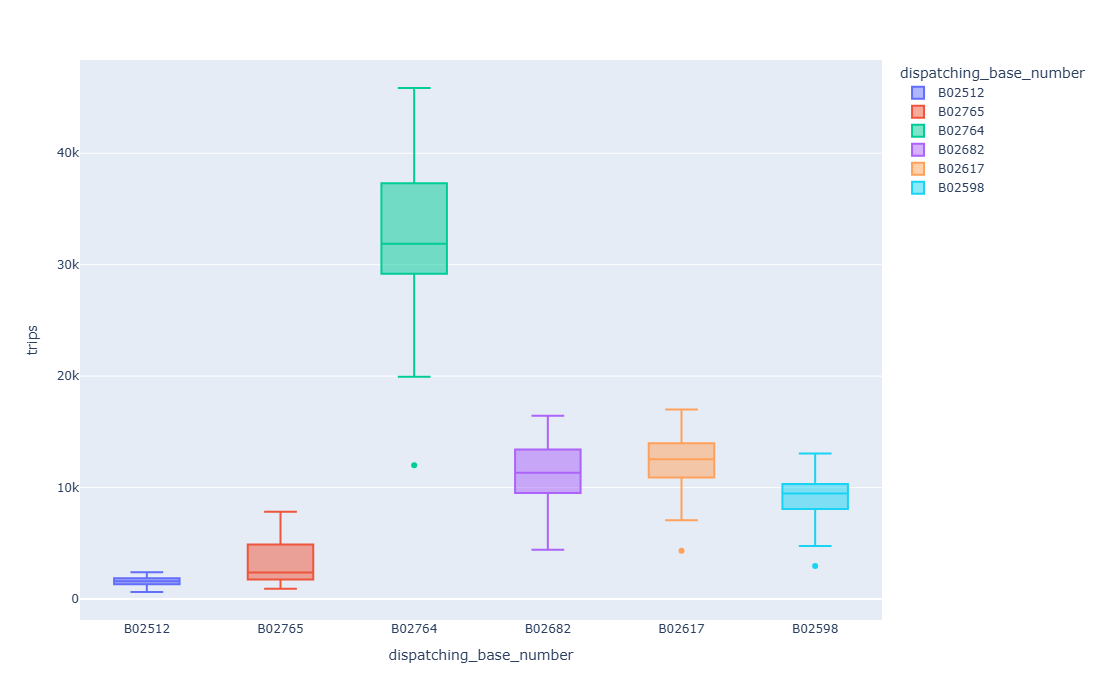

In [48]:
px.box(x='dispatching_base_number',
       y='trips',data_frame = uberFOIL, orientation ='v',width = 800, height =700 ,color= 'dispatching_base_number')

In [51]:
uberFOIL['Month'] = uberFOIL['date'].dt.month
uberFOIL['Monthname'] = uberFOIL['date'].dt.strftime('%b')
uberFOIL['Hours'] = uberFOIL['date'].dt.hour
uberFOIL['Dayname'] = uberFOIL['date'].dt.day_name()
uberFOIL['Daynumber']=uberFOIL['date'].dt.day

In [52]:
uberFOIL.head()

dispatching_base_number       date  active_vehicles  trips  Month Monthname  \
0                  B02512 2015-01-01              190   1132      1       Jan   
1                  B02765 2015-01-01              225   1765      1       Jan   
2                  B02764 2015-01-01             3427  29421      1       Jan   
3                  B02682 2015-01-01              945   7679      1       Jan   
4                  B02617 2015-01-01             1228   9537      1       Jan   

   Hours   Dayname  Daynumber  
0      0  Thursday          1  
1      0  Thursday          1  
2      0  Thursday          1  
3      0  Thursday          1  
4      0  Thursday          1

In [62]:
uberFOIL['Monthname'] =pd.Categorical(uberFOIL['Monthname'],categories = order_month, ordered =True)
uberFOIL['Dayname'] =pd.Categorical(uberFOIL['Dayname'],categories = order_day, ordered =True)

In [73]:
subdf = uberFOIL.groupby(['Dayname','Monthname'],as_index = False)['trips'].sum()
subdf = subdf[subdf['trips']!=0]

C:\Users\saysa\AppData\Local\Temp\ipykernel_20208\141002868.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



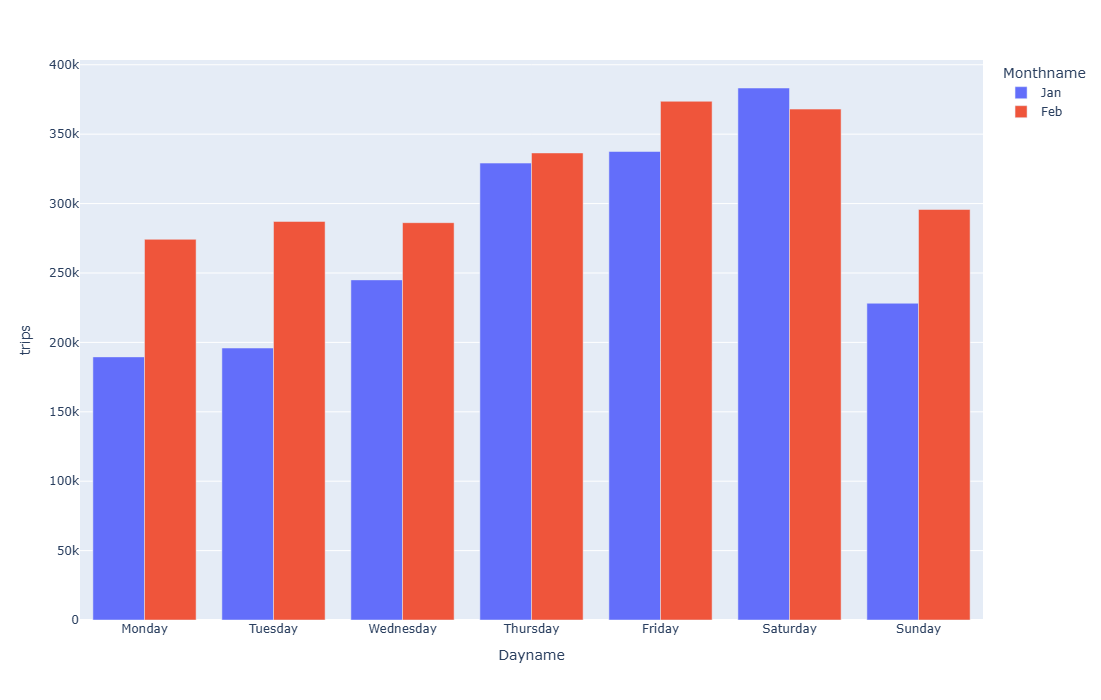

In [75]:
px.bar(data_frame= subdf,x ='Dayname',y='trips',color='Monthname',category_orders = {'Monthname':order_month,'Dayname':order_day}, barmode = 'group', width = 1100 , height = 700)

In [84]:
subdf1 = uberFOIL.groupby(['Daynumber','Monthname'],as_index=False)['trips'].sum()
subdf1.value_counts()

C:\Users\saysa\AppData\Local\Temp\ipykernel_20208\777452211.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Daynumber  Monthname  trips
1          Jan        56437    1
           Feb        76910    1
           Mar        0        1
           Apr        0        1
           May        0        1
                              ..
31         Feb        0        1
           Mar        0        1
           Apr        0        1
           May        0        1
           Jun        0        1
Name: count, Length: 186, dtype: int64

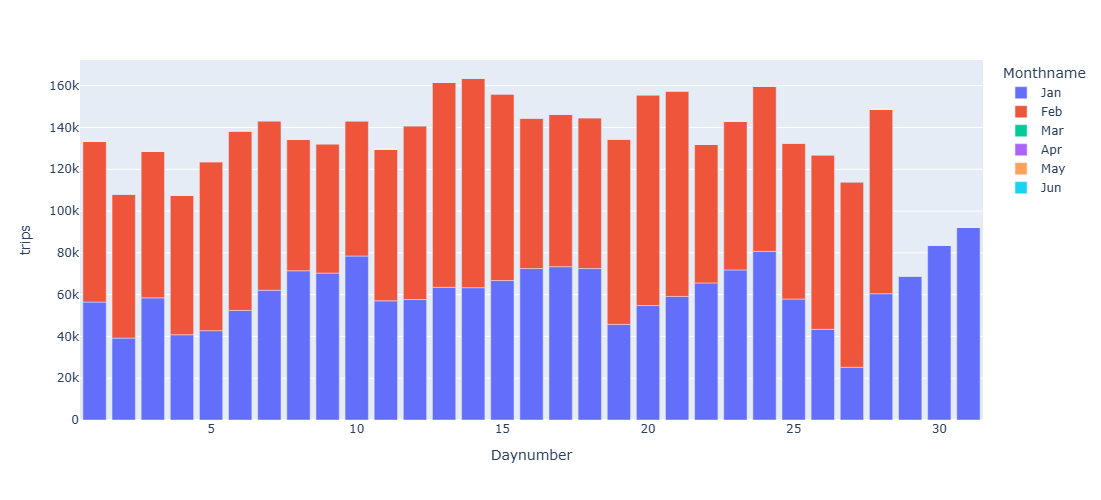

In [88]:
px.bar(data_frame = subdf1, x = 'Daynumber', y= 'trips', color = 'Monthname', category_orders = {'Monthname':order_month}, width = 1000, height =500)

In [65]:
import folium
from folium.plugins import HeatMap

In [66]:
basemap = folium.Map()

In [67]:
files = os.listdir(r'C:\Users\saysa\Desktop\GIthub Repos\DATA ANALYTICS PROJECTS\UberProject\Uber\Datasets')

In [68]:
files

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [69]:
files = files[-8:]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [70]:
files.remove('uber-raw-data-janjune-15.csv')

In [71]:
files.remove('uber-raw-data-janjune-15_sample.csv')

In [72]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [74]:
main = pd.DataFrame()
pwd = r'C:\Users\saysa\Desktop\GIthub Repos\DATA ANALYTICS PROJECTS\UberProject\Uber\Datasets'
for file in files:
    current_pd = pd.read_csv(pwd+'/'+file)
    main = pd.concat([current_pd,main])

main

Date/Time      Lat      Lon    Base
0         9/1/2014 0:01:00  40.2201 -74.0021  B02512
1         9/1/2014 0:01:00  40.7500 -74.0027  B02512
2         9/1/2014 0:03:00  40.7559 -73.9864  B02512
3         9/1/2014 0:06:00  40.7450 -73.9889  B02512
4         9/1/2014 0:11:00  40.8145 -73.9444  B02512
...                    ...      ...      ...     ...
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764

[4534327 rows x 4 columns]

In [75]:
main.duplicated().sum()

np.int64(82581)

In [76]:
main.drop_duplicates(inplace= True)

In [77]:
main.duplicated().sum()

np.int64(0)

In [78]:
main = main.sample(frac = 0.05,random_state = 42)

In [79]:
main.groupby(['Lat','Lon'],as_index=False).size()

Lat      Lon  size
0       39.9055 -74.0791     1
1       40.0807 -74.0528     1
2       40.0893 -74.0430     1
3       40.0944 -74.0453     1
4       40.0945 -74.0367     1
...         ...      ...   ...
124529  41.1786 -73.7915     1
124530  41.1942 -73.8882     1
124531  41.1966 -73.7199     1
124532  41.2200 -73.9011     1
124533  41.3476 -73.6709     1

[124534 rows x 3 columns]

In [80]:
HeatMap(main.groupby(['Lat','Lon'],as_index=False).size(),min_opacity =0.1).add_to(basemap)

In [81]:
basemap

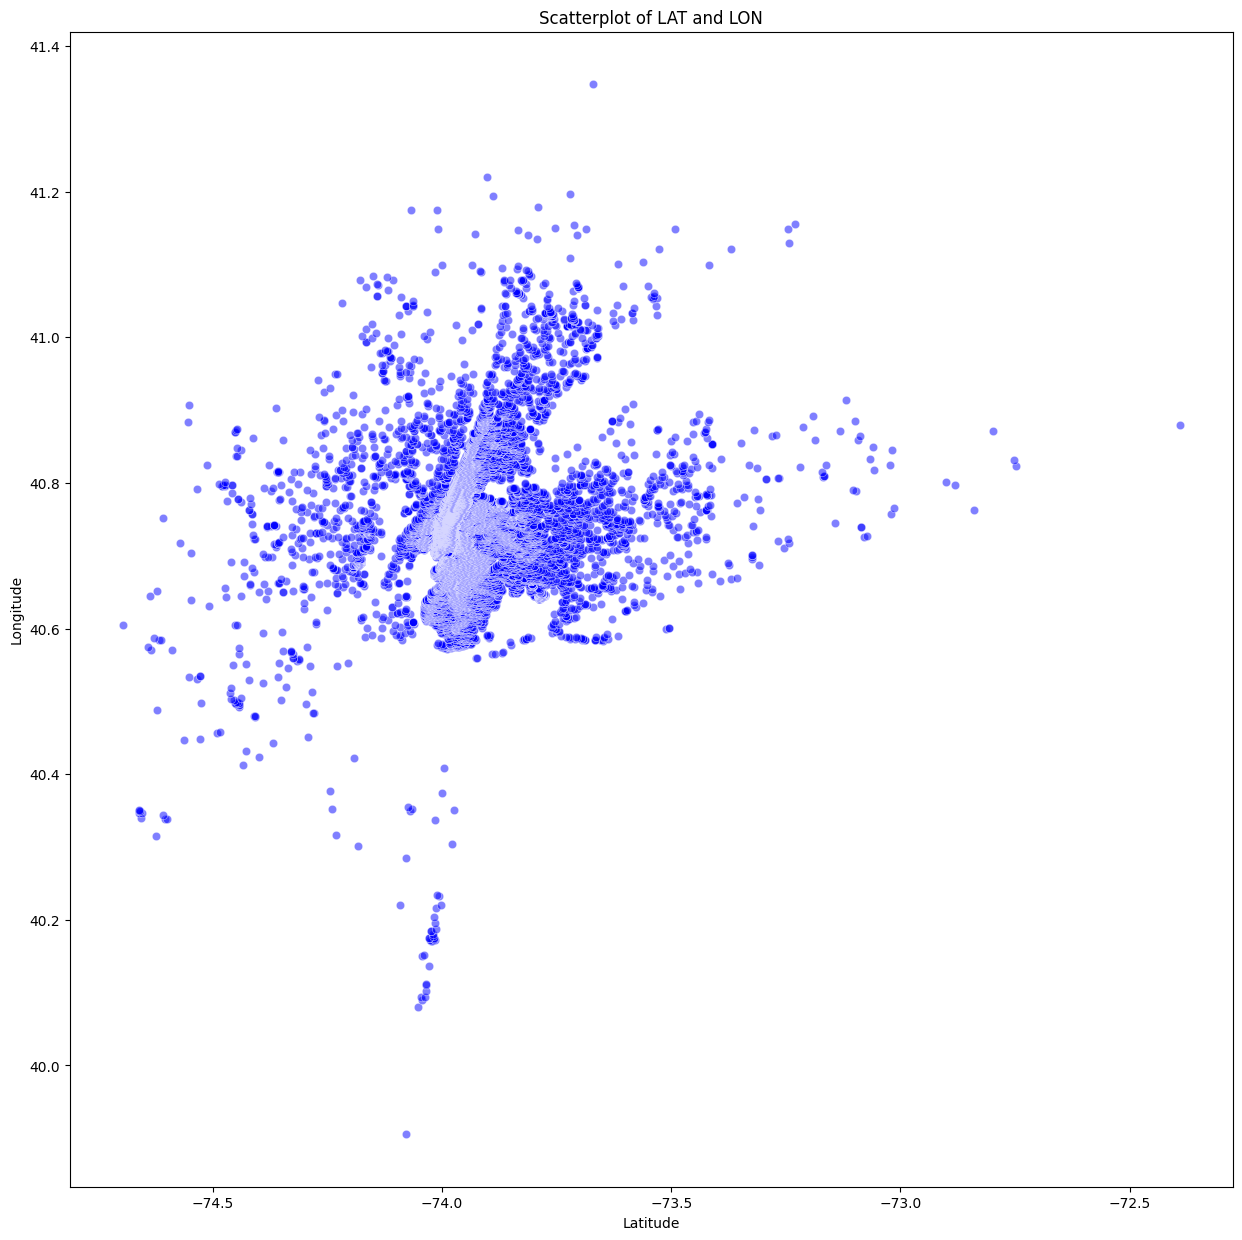

In [82]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='Lon',y='Lat',data= main.groupby(['Lat','Lon'],as_index=False).size(),alpha = 0.5,color='blue')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatterplot of LAT and LON')
plt.show()